In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import lu
import sympy as sym
import matplotlib.pyplot as plt

In [403]:
def gauss(A):
    [r, c] = A.shape
    for i in range(0,r-1):
        for j in range(i+1,r):
            A[j,:] = A[j,:] - (A[j, i]/A[i, i]) * A[i,:]
    return A

In [404]:
def gauss(A):
    [r, c] = A.shape
    for i in range(0,r-1):
        A[i+1:r,:] = A[i+1:r,:] - (np.outer((A[i+1:r, [i]]/A[i, i]),A[i,:]))
    return A

<h2>Algorithm 1-2

In [385]:
def gaussianpivoting(A):
    [m, n] = A.shape
    P = np.eye(m, m)
    for k in range(0, m):
        r = abs(A[k:, k]).argmax()
        q = r + k
        P[[k,q],:] = P[[q,k],:]
        A[[k,q],:] = A[[q,k],:]
        if A[k,k] != 0:
            A[k+1:,k] = A[k+1:,k] / A[k,k]
            A[k+1:,k+1:] = A[k+1:,k+1:] - np.outer(A[k+1:,k],A[k, k+1:])
    
    L = np.eye(m,m) + np.tril(A, -1)
    U = np.triu(A)
    return P,L,U

In [430]:
A = np.random.random((3,3))

In [431]:
P1,L1,U1 = gaussianpivoting(A.copy())

In [432]:
P2,L2,U2 = lu(A.copy())

In [433]:
P1.all() == P2.all()

True

In [434]:
L1.all() == L2.all()

True

In [435]:
U1.all() == U2.all()

True

<h2>Algorithm 1-3

In [479]:
def plusol(A, b):
    P, L, U = gaussianpivoting(A)
    m, n = A.shape
    
    y = np.zeros((m, 1))
    x = np.zeros((n, 1))
    c = P @ b
    for i in range(0, m):
        y[i] = c[i] - L[i, :i]@ y[:i]
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - U[j, j+1:]@x[j+1:]) / U[j,j]
    return x

In [515]:
A = np.array([[1,1,2],[4,-3,1],[-1,6,6]]).astype('float')

In [482]:
A

array([[ 1.,  1.,  2.],
       [ 4., -3.,  1.],
       [-1.,  6.,  6.]])

In [495]:
b = np.array([[5],[-1],[17]]).astype('float')

In [484]:
b

array([[ 5.],
       [-1.],
       [17.]])

In [499]:
x1 = plusol(A,b)

In [496]:
x2 = np.linalg.solve(A,b)

In [500]:
x

array([[1.],
       [2.],
       [1.]])

In [501]:
x2

array([[1.],
       [2.],
       [1.]])

<h2>Algorithm 1-4

In [546]:
def determinant(A):
    A = A.copy()
    P,L,U = gaussianpivoting(A)
    return np.linalg.det(P) * np.prod(U.diagonal())

In [553]:
A = np.random.rand(4,4)

In [554]:

determinant(A.copy())

0.017897835609600368

In [555]:

np.linalg.det(A.copy())

0.01789783560960036

<h2>Algorithm 1-6

In [561]:
def cramer(A, b):
    m, n = A.shape
    x = np.zeros((n,1))
    for i in range(0, n):
        B = A.copy()
        B[:,i] = b.T
        x[i] = determinant(B) / determinant(A)
    return x

In [562]:
A = np.array([[1,1,2],[4,-3,1],[-1,6,6]]).astype('float')

In [564]:
b = np.array([[5],[-1],[17]]).astype('float')

In [565]:
cramer(A,b)

array([[1.],
       [2.],
       [1.]])

In [566]:
np.linalg.solve(A,b)

array([[1.],
       [2.],
       [1.]])

<h2>Algorithm 2-1

In [624]:
A = np.array([[1,1, 2, -1],[4, 3, 6, -5],[-1, -2, -4, 0]])

In [625]:
b = np.array([[-1],[-4],[1]])

In [630]:
def particular_solution(A, b):
    m, n = A.shape
    rref, pivcol = sym.Matrix(np.concatenate((A,b),axis=1)).rref()
    rank = len(pivcol)
    if max(pivcol) == n:
        raise Exception
    
    x = np.zeros((n,1))
    d = np.array(rref[:, n])
    x[list(pivcol)] = d[0:rank]
    
    return x

In [631]:
particular_solution(A,b)

array([[-1.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [633]:
A @ particular_solution(A,b) == b

array([[ True],
       [ True],
       [ True]])

<h2>2-6

In [2]:
A1 = np.array([[0,0],[0,0.27]])
A2 = np.array([[-0.139,0.263],[0.246,0.224]])
A3 = np.array([[0.17,-0.215],[0.222,0.176]])
A4 = np.array([[0.781,0.034],[-0.032,0.739]])
A = [A1, A2, A3, A4]

In [3]:
d1 = np.array([[0.5],[0]])
d2 = np.array([[0.57], [-0.036]])
d3 = np.array([[0.408],[0.0893]])
d4 = np.array([[0.1075],[0.27]])
D = [d1, d2, d3, d4]

In [4]:
p1, p2, p3, p4 = 0.02, 0.15, 0.13, 0.70

In [5]:
z = [None] * 1000

In [6]:
z[0] = np.random.random((2,1))

In [7]:
for k in range(1,1000):
    index = np.random.choice([0,1,2,3],p=[p1,p2,p3,p4])
    z[k] = A[index] @ z[k-1] + D[index]
    

In [8]:
x = []
y = []
for k in range(0,1000):
    x.append(z[k][0])
    y.append(z[k][1])

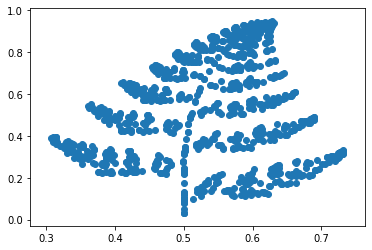

In [10]:
plt.scatter(x,y)

<h3>2-6-b

In [11]:
A = [A1, A2, A3]
D = [d1, d2, d3]
p1,p2,p3 = 0.7, 0.2, 0.1

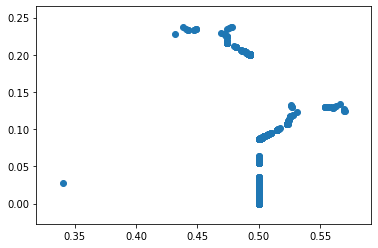

In [12]:
z = [None] * 1000
z[0] = np.random.random((2,1))
for k in range(1,1000):
    index = np.random.choice([0,1,2],p=[p1,p2,p3])
    z[k] = A[index] @ z[k-1] + D[index]
x = []
y = []
for k in range(0,1000):
    x.append(z[k][0])
    y.append(z[k][1])
plt.scatter(x,y)